In [1]:
# Import Basic Libraries

import numpy as np
import pandas as pd

# Import Visualization  Libraries

import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

dataset = pd.read_csv('default of credit card clients.csv')
dataset.drop(['ID'], axis = 1, inplace = True)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Take a look at missing data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
dataset.isnull().sum().sort_values(ascending = False)

LIMIT_BAL                     0
SEX                           0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT2                     0
BILL_AMT1                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
default payment next month    0
dtype: int64

In [5]:
# Split our dataset into feature and target dataframes

# Our Feature Dataset
X = dataset.drop(['ID', 'default payment next month'], axis = 1)

# Our Target 
Y = dataset['default payment next month']

In [23]:
#  Taking a look at our Features

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
# Dimensions of our Features

X.shape

(30000, 23)

In [7]:
# Taking a look at our Target

Y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [8]:
# Dimensions of our Target

Y.shape

(30000,)

In [9]:
# Taking a closer look at Categorical Variables

X[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [22]:
# Calculate the number of Defaults in the Dataset

print("The number of Defaults is:",Y.sum())

The number of Defaults is: 6636


In [23]:
# Calculating the number of on time payments in the datasets

print("The number of on time payments is:",len(Y)-Y.sum())

The number of on time payments is: 23364


In [24]:
# Calculating the percentage of defaults among the dataset

print("The percent of payments that are defaults:",Y.sum()/len(Y)*100,"%")

The percent of payments that are defaults: 22.12 %


In [25]:
# Calculating the percentage of on time payments

print("The any model we create should perform better than the baseline of",(1-Y.sum()/len(Y))*100,"%")

The any model we create should perform better than the baseline of 77.88 %


In [28]:
# Splitting the Dataset into Train and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [70]:
# Balancing Dataset by Oversampling the minority class

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 589)
X_SMOTE, Y_SMOTE = smote.fit_sample(X, Y)

print("Number of total instances", len(Y_SMOTE))
print("Number of Defaults", Y_SMOTE.sum())
print("Percentage of Defaults among the balanced dataset", Y_SMOTE.sum()/len(Y_SMOTE)*100, "%")

Number of total instances 46728
Number of Defaults 23364
Percentage of Defaults among the balanced dataset 50.0 %


In [71]:
# New Balanced Test and Train Splits

X_train_Smote, X_test_Smote, Y_train_Smote, Y_test_Smote = train_test_split(X_SMOTE, Y_SMOTE, test_size = 0.2, random_state = 20)

In [69]:
# Logistic Regression UNBALANCED

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, precision_score


LR = LogisticRegression()
LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)

print(classification_report(Y_pred, Y_test))
print(confusion_matrix(Y_pred, Y_test))
print('\nTest Accuracy Score for Logistic Regression:', round(accuracy_score(Y_pred,Y_test)*100,2),"%")
print("Test Precision Score for Logistic Regression:",round(precision_score(Y_pred, Y_test)*100,2),"%")

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4687 1313]
 [   0    0]]

Test Accuracy Score for Logistic Regression: 78.12 %
Test Precision Score for Logistic Regression: 0.0 %


In [73]:
# Logistic Regression BALANCED

LR_Balanced = LogisticRegression()
LR_Balanced.fit(X_train_Smote, Y_train_Smote)

Y_pred_Balanced = LR_Balanced.predict(X_test_Smote)

print(classification_report(Y_pred_Balanced, Y_test_Smote))
print(confusion_matrix(Y_pred_Balanced, Y_test_Smote))
print('\nTest Accuracy Score for Logistic Regression: ', round(accuracy_score(Y_pred_Balanced,Y_test_Smote)*100,2),"%")
print("Test Precision Score for Logistic Regression:",round(precision_score(Y_pred_Balanced, Y_test_Smote)*100,2),"%")

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      6401
           1       0.40      0.64      0.49      2945

    accuracy                           0.58      9346
   macro avg       0.59      0.60      0.57      9346
weighted avg       0.65      0.58      0.60      9346

[[3584 2817]
 [1064 1881]]

Test Accuracy Score for Logistic Regression:  58.47 %
Test Precision Score for Logistic Regression: 40.04 %


In [81]:
# ROC Curve UNBALANCED

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
print(roc_auc_score(Y_test, Y_pred))

0.5


AUC: 0.500


<function matplotlib.pyplot.show(close=None, block=None)>

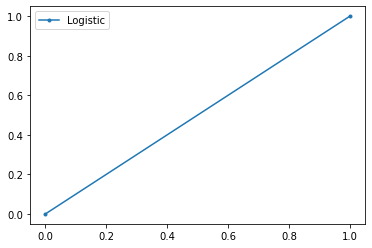

In [88]:
# AUC Curve for UNBALANCED

auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend()
plt.show

In [85]:
# ROC Curve BALANCED

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

b_fpr, b_tpr, b_thresholds = roc_curve(Y_test_Smote, Y_pred_Balanced)
print(roc_auc_score(Y_test_Smote, Y_pred_Balanced))

0.5857337395559249


AUC: 0.586


<function matplotlib.pyplot.show(close=None, block=None)>

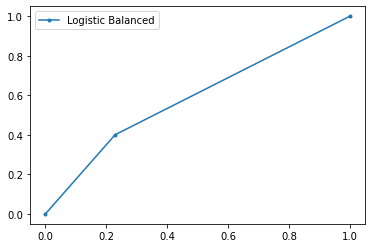

In [89]:
# AUC Curve for BALANCED

auc_balanced = roc_auc_score(Y_test_Smote, Y_pred_Balanced)
print('AUC: %.3f' % auc_balanced)

plt.plot(b_fpr, b_tpr, marker='.', label='Logistic Balanced')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

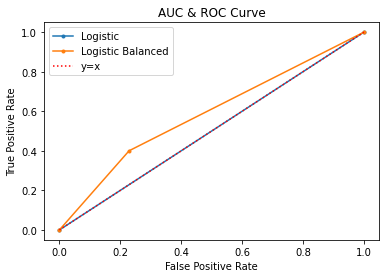

In [96]:
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(b_fpr, b_tpr, marker='.', label='Logistic Balanced')
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
plt.plot(x, y, ':r', label = 'y=x')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC & ROC Curve")
plt.legend()
plt.show

In [4]:
from pandas_profiling import ProfileReport

report = ProfileReport(dataset)
report.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]